In [1]:
from channel import channel
import h5py
import pandas as pd
import numpy as np

In [2]:
filename = "data/210601_NBS295-106/20210601_152616_mass-001.hdf5"
with h5py.File(filename, "r") as hdf_file:
    channels = pd.DataFrame(columns=["energy"], index=hdf_file.keys())

    for channel_name in hdf_file:
        goint_in = np.array(hdf_file[channel_name]["filt_value"])
        goint_in = goint_in[(goint_in > 0) & (goint_in < np.percentile(goint_in, 97))]
        channels.loc[channel_name, "energy"] = goint_in


In [3]:
chan1 = channel(pd.Series(channels.loc['chan1', 'energy']))

In [4]:
chan1.savgol_baseline_subtract()

0       2.254639
1       1.280792
2       1.306400
3      -0.668532
4      -0.644001
          ...   
9995    2.131327
9996   -1.852319
9997    0.164380
9998    1.181429
9999    0.198830
Length: 10000, dtype: float64

None


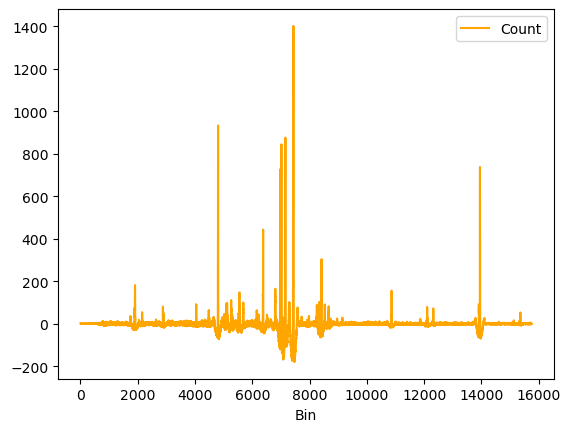

In [5]:
chan1.plot_channel(True)